In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset

In [34]:
# Load Fashion MNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

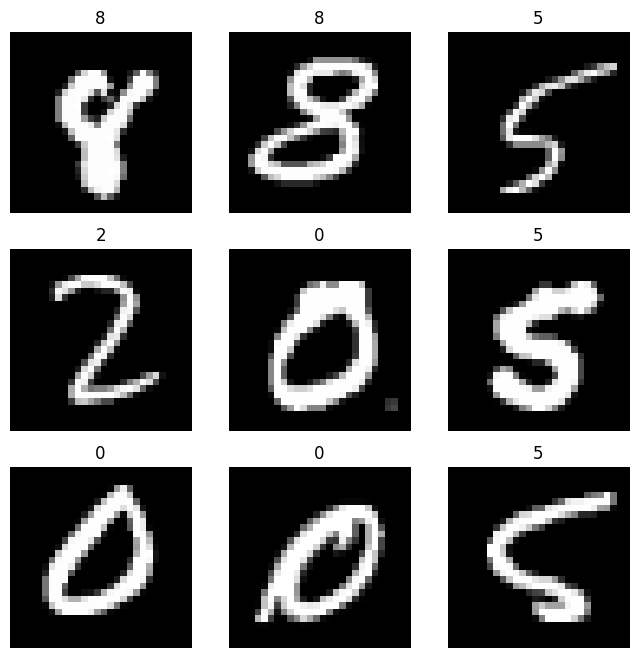

In [35]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

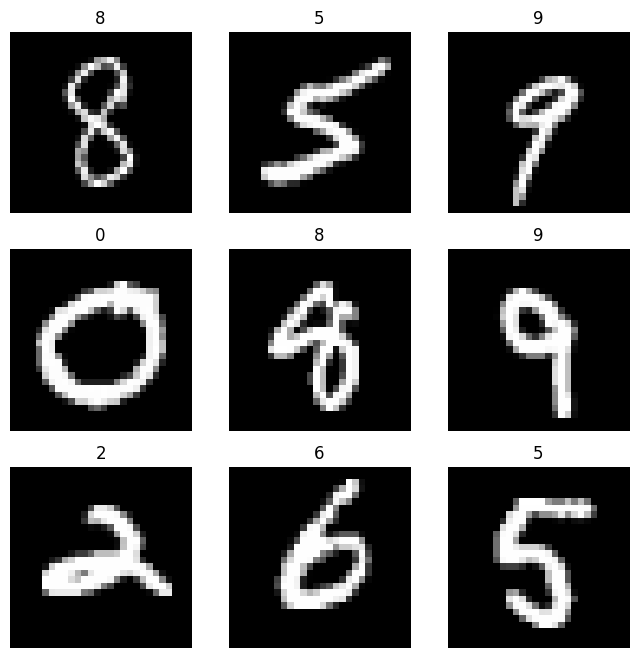

In [36]:
#Test DataSet
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [37]:
#Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

In [38]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.03390180259943
Epoch 1, Batch 200, Loss: 0.4579564884305
Epoch 1, Batch 300, Loss: 0.39064122930169104
Epoch 1, Batch 400, Loss: 0.36017113640904425
Epoch 1, Batch 500, Loss: 0.33144756846129897
Epoch 1, Batch 600, Loss: 0.3153042985498905
Epoch 1, Batch 700, Loss: 0.2959263802319765
Epoch 1, Batch 800, Loss: 0.2744249289482832
Epoch 1, Batch 900, Loss: 0.25130060777068136
Epoch 2, Batch 100, Loss: 0.22870298199355601
Epoch 2, Batch 200, Loss: 0.22307255648076535
Epoch 2, Batch 300, Loss: 0.21197534050792455
Epoch 2, Batch 400, Loss: 0.2002054303139448
Epoch 2, Batch 500, Loss: 0.2018730279430747
Epoch 2, Batch 600, Loss: 0.1919681115821004
Epoch 2, Batch 700, Loss: 0.20501610275357962
Epoch 2, Batch 800, Loss: 0.1554367426969111
Epoch 2, Batch 900, Loss: 0.1763871154934168
Epoch 3, Batch 100, Loss: 0.15388858901336788
Epoch 3, Batch 200, Loss: 0.14752139814198018
Epoch 3, Batch 300, Loss: 0.14234242912381886
Epoch 3, Batch 400, Loss: 0.14336341504007577
Epo

Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

In [39]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9615%


In [40]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

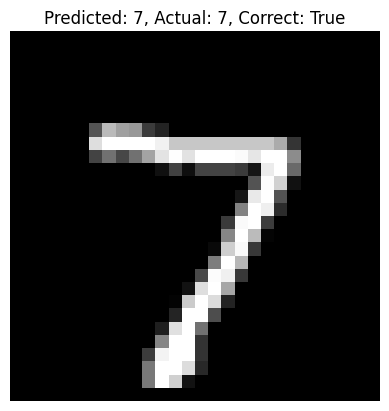

In [41]:
model.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[0], labels[0]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model(image.unsqueeze(0))
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

Step 4. Choose one of the proposed modifications below:
Add another Dense layer of 128 nodes
Increase the current number of nodes in the layer to 256
Hypothesize how it would change the performance results
Addition of another Dense Layer of 128 nodes

Increase the current number of nodes in the layer to 256
Hypothesize how it would change the performance results
Addition of another Dense Layer of 128 nodes

It is expected that adding an additional dense layer with 128 nodes could improve the model's recognition of deeper information in the input data, perhaps improving its learning capacity. Such changes may lead to improved accuracy on the training dataset as the model could be more adaptable to the unique characteristics of the data. However, this modification carries a risk of overfitting, which is typified by good performance on training data but decreased efficacy on new, unknown data since the model adjusts to the specifics of the training set rather than general patterns. Consequently, it is essential to closely monitor the model to ensure that it retains its ability to generalise to new data.

Step 5. Modify the model based on the chosen method and train

In [42]:
class MLP_Modified_AddLayer(nn.Module):
    def __init__(self):
        super(MLP_Modified_AddLayer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc2_5 = nn.Linear(64, 128)  # Additional layer
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc2_5(x))  # Pass through the new layer
        x = self.fc3(x)
        return x

model1 = MLP_Modified_AddLayer()

In [43]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1286916241049767
Epoch 1, Batch 200, Loss: 0.46641456574201584
Epoch 1, Batch 300, Loss: 0.3834039156138897
Epoch 1, Batch 400, Loss: 0.364818664342165
Epoch 1, Batch 500, Loss: 0.32296780385077
Epoch 1, Batch 600, Loss: 0.28753779977560046
Epoch 1, Batch 700, Loss: 0.2724118319898844
Epoch 1, Batch 800, Loss: 0.25892552398145197
Epoch 1, Batch 900, Loss: 0.23239325948059558
Epoch 2, Batch 100, Loss: 0.22684907168149948
Epoch 2, Batch 200, Loss: 0.17750521373003722
Epoch 2, Batch 300, Loss: 0.19866807412356138
Epoch 2, Batch 400, Loss: 0.1989980299398303
Epoch 2, Batch 500, Loss: 0.1821615517139435
Epoch 2, Batch 600, Loss: 0.18037853015586733
Epoch 2, Batch 700, Loss: 0.1800374598801136
Epoch 2, Batch 800, Loss: 0.1644525172561407
Epoch 2, Batch 900, Loss: 0.16604759506881236
Epoch 3, Batch 100, Loss: 0.14593914397992194
Epoch 3, Batch 200, Loss: 0.14227137587964533
Epoch 3, Batch 300, Loss: 0.14438008320517837
Epoch 3, Batch 400, Loss: 0.13381288569420577


Step 6. Report on the results of the modified model and if it matches your hypothesis

In [44]:
# Evaluate the model
model1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)}%')

Accuracy on test set: 0.9622833333333334%


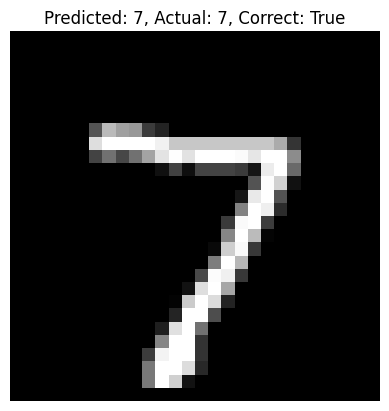

In [45]:
model1.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[0], labels[0]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model1(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [46]:
class MLP_AddDL(nn.Module):
    def __init__(self):
        super(MLP_AddDL, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.1)  # Dropout layer after first linear layer
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.1)  # Dropout layer after second linear layer
        self.fc2_5 = nn.Linear(64, 128)  # Additional layer
        self.dropout3 = nn.Dropout(0.1)  # Dropout layer after additional layer
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc2_5(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        return x

model2 = MLP_AddDL()

In [47]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.2296066161990167
Epoch 1, Batch 200, Loss: 0.5320974513888359
Epoch 1, Batch 300, Loss: 0.43701318293809893
Epoch 1, Batch 400, Loss: 0.38033345878124236
Epoch 1, Batch 500, Loss: 0.3617000575363636
Epoch 1, Batch 600, Loss: 0.3212749634683132
Epoch 1, Batch 700, Loss: 0.28642811082303526
Epoch 1, Batch 800, Loss: 0.2706386349350214
Epoch 1, Batch 900, Loss: 0.28504717625677584
Epoch 2, Batch 100, Loss: 0.24221269272267817
Epoch 2, Batch 200, Loss: 0.23287601761519908
Epoch 2, Batch 300, Loss: 0.22704182736575604
Epoch 2, Batch 400, Loss: 0.22716666281223297
Epoch 2, Batch 500, Loss: 0.22340688280761242
Epoch 2, Batch 600, Loss: 0.21213046181946993
Epoch 2, Batch 700, Loss: 0.21246430145576597
Epoch 2, Batch 800, Loss: 0.205450149923563
Epoch 2, Batch 900, Loss: 0.19545448198914528
Epoch 3, Batch 100, Loss: 0.17899585425853728
Epoch 3, Batch 200, Loss: 0.18848776169121265
Epoch 3, Batch 300, Loss: 0.1779576970823109
Epoch 3, Batch 400, Loss: 0.16909420989453

In [48]:
# Evaluate the model
model2.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)}%')

Accuracy on test set: 0.9638333333333333%


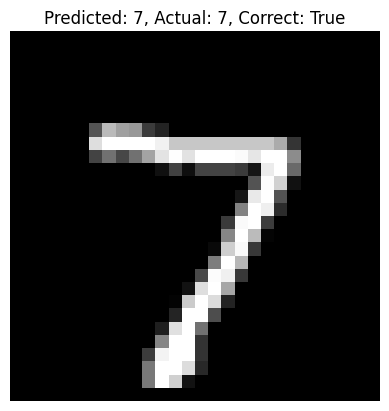

In [49]:
model2.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[0], labels[0]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model2(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

Adding dropout layer did increase the accuracy.

Changed the optimizer from Adam to LeakyRelu

In [50]:
class MLP_AddDLO(nn.Module):
    def __init__(self):
        super(MLP_AddDLO, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.1)  # Dropout layer after first linear layer
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.1)  # Dropout layer after second linear layer
        self.fc2_5 = nn.Linear(64, 128)  # Additional layer
        self.dropout3 = nn.Dropout(0.1)  # Dropout layer after additional layer
        self.fc3 = nn.Linear(128, 10)
        self.leaky_relu = nn.LeakyReLU(0.01)  # Define the LeakyReLU activation function

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.leaky_relu(self.fc2_5(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        return x

model3 = MLP_AddDLO()


In [51]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model3.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.1416689923405647
Epoch 1, Batch 200, Loss: 0.5304035963118077
Epoch 1, Batch 300, Loss: 0.4367147193849087
Epoch 1, Batch 400, Loss: 0.3581989727914333
Epoch 1, Batch 500, Loss: 0.3452123594284058
Epoch 1, Batch 600, Loss: 0.3302934210002422
Epoch 1, Batch 700, Loss: 0.27364796184003354
Epoch 1, Batch 800, Loss: 0.28125663220882413
Epoch 1, Batch 900, Loss: 0.2827873811125755
Epoch 2, Batch 100, Loss: 0.2353743113949895
Epoch 2, Batch 200, Loss: 0.23268445260822773
Epoch 2, Batch 300, Loss: 0.22892265573143958
Epoch 2, Batch 400, Loss: 0.19398969177156686
Epoch 2, Batch 500, Loss: 0.19459936141967774
Epoch 2, Batch 600, Loss: 0.214766316562891
Epoch 2, Batch 700, Loss: 0.21008921820670368
Epoch 2, Batch 800, Loss: 0.18719102017581463
Epoch 2, Batch 900, Loss: 0.19139412615448237
Epoch 3, Batch 100, Loss: 0.1719913355074823
Epoch 3, Batch 200, Loss: 0.19340666484087707
Epoch 3, Batch 300, Loss: 0.1667526251077652
Epoch 3, Batch 400, Loss: 0.17302405040711163


In [52]:
# Evaluate the model
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)}%')

Accuracy on test set: 0.9645666666666667%


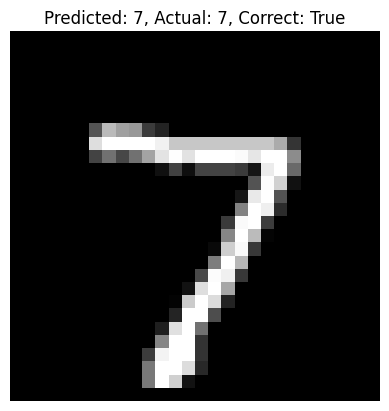

In [53]:
model3.eval()  # Set model to evaluation mode

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[0], labels[0]  # Select the first image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model3(image.unsqueeze(0))  # Add batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = predicted_label == true_label

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()}, Correct: {is_correct.item()}')
plt.axis('off')
plt.show()

Changing the activation function showed very little difference. Let's check using a differnet loss function whic is MSE Loss function.

In [54]:
class MLP_AddDLO(nn.Module):
    def __init__(self):
        super(MLP_AddDLO, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.1)
        self.fc2_5 = nn.Linear(64, 128)
        self.dropout3 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(128, 10)
        self.leaky_relu = nn.LeakyReLU(0.01)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.leaky_relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.leaky_relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.leaky_relu(self.fc2_5(x))
        x = self.dropout3(x)
        x = self.fc3(x)
        return x

model3 = MLP_AddDLO()



In [55]:
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.RMSprop(model3.parameters(), lr=0.001)

# Adjust training loop to use MSE Loss
num_epochs = 5
for epoch in range(num_epochs):
    model3.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        # Convert labels to one-hot encoded format for MSE Loss
        one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=10).float()
        optimizer.zero_grad()
        outputs = model3(inputs)
        # Apply softmax to model outputs to use with MSE Loss
        outputs = torch.nn.functional.softmax(outputs, dim=1)
        loss = criterion(outputs, one_hot_labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.05741669939830899
Epoch 1, Batch 200, Loss: 0.024818076314404608
Epoch 1, Batch 300, Loss: 0.02045475462451577
Epoch 1, Batch 400, Loss: 0.0186290187202394
Epoch 1, Batch 500, Loss: 0.01502087372355163
Epoch 1, Batch 600, Loss: 0.0141235481062904
Epoch 1, Batch 700, Loss: 0.013429675467777997
Epoch 1, Batch 800, Loss: 0.01334715356118977
Epoch 1, Batch 900, Loss: 0.012975511197000742
Epoch 2, Batch 100, Loss: 0.011618018732406199
Epoch 2, Batch 200, Loss: 0.011536366464570165
Epoch 2, Batch 300, Loss: 0.010980002928990871
Epoch 2, Batch 400, Loss: 0.010787793945055454
Epoch 2, Batch 500, Loss: 0.0103225676715374
Epoch 2, Batch 600, Loss: 0.01079213785356842
Epoch 2, Batch 700, Loss: 0.010260475260438398
Epoch 2, Batch 800, Loss: 0.009317290898179635
Epoch 2, Batch 900, Loss: 0.010155250660609454
Epoch 3, Batch 100, Loss: 0.00917885169852525
Epoch 3, Batch 200, Loss: 0.009501928794197739
Epoch 3, Batch 300, Loss: 0.009853580192866503
Epoch 3, Batch 400, Loss:

In [56]:
# Evaluate the model
model3.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model3(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { (correct / total)}%')

Accuracy on test set: 0.9527%


There was a decrease in the accuracy.